### Brain activity pattern differences in ADHD 
### Stage 1. Data Exploration 

This notebook focuses on **exploring the dataset** to understand it and modify it as necessary in order to prepare the data for modelling.

Goals:
- Load and inspect datasets  
- Handle missing values  
- Merge datasets  
- Perform exploratory data analysis (EDA)  
- Identify correlations and distributions of key features  

The main purpose is to get important and well structured data,  without irrelevant fetaures in order to then proceed to the modelling stage so that a good method to diagnose ADHD can be created.

**Diego Armando Salinas Lugo**

*ds24353* 2401168

In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler

*Step 1* : Loading Datasets

In [2]:
# Loading datasets 
labels = pd.read_excel(r"C:\Users\Salin\OneDrive\Documentos\ESSEX\DataScience\Exploration\ce888_data_2025\ce888_data_2025\Data\LABELS.xlsx")  # ADHD diagnosis & sex labels
metadata_a = pd.read_excel(r"C:\Users\Salin\OneDrive\Documentos\ESSEX\DataScience\Exploration\ce888_data_2025\ce888_data_2025\Data\METADATA_A.xlsx")  # Socio-demographic info
metadata_b = pd.read_excel(r"C:\Users\Salin\OneDrive\Documentos\ESSEX\DataScience\Exploration\ce888_data_2025\ce888_data_2025\Data\METADATA_B.xlsx")  # Socio-demographic info
connectome_matrices = pd.read_csv(r"C:\Users\Salin\OneDrive\Documentos\ESSEX\DataScience\Exploration\ce888_data_2025\ce888_data_2025\Data\FUNCTIONAL_CONNECTOME_MATRICES.csv")  # fMRI connectivity data

# Displaying first few rows of each dataset
print("LABELS dataset:")
display(labels.head())

print("METADATA_A dataset:")
display(metadata_a.head())

print("METADATA_B dataset:")
display(metadata_b.head())

print("FUNCTIONAL CONNECTOME MATRICES dataset:")
display(connectome_matrices.head())


LABELS dataset:


,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


METADATA_A dataset:


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


METADATA_B dataset:


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


FUNCTIONAL CONNECTOME MATRICES dataset:


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [79]:
# Looking for common column names to know which will be the key for merging
common_cols = set(labels.columns) & set(metadata_a.columns) & set(metadata_b.columns) & set(connectome_matrices.columns)
print("\nCommon columns in all datasets:", common_cols)


Common columns in all datasets: {'participant_id'}


*Step 2* : Handling Missing Values

Before merging, checking for missing values in each dataset.


In [80]:
# Checking for missing values in each dataset
print("\nMissing values in LABELS dataset:")
print(labels.isnull().sum())

print("\nMissing values in METADATA_A dataset:")
print(metadata_a.isnull().sum())



Missing values in LABELS dataset:
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64

Missing values in METADATA_A dataset:
participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [81]:
print("\nMissing values in METADATA_B dataset:")
print(metadata_b.isnull().sum())

print("\nMissing values in FUNCTIONAL CONNECTOME MATRICES dataset:")
print(connectome_matrices.isnull().sum())


Missing values in METADATA_B dataset:
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

Missing values in FUNCTIONAL CONNECTOME MATRICES dataset:
participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


Step 2.1: Handling missing values

Filling missing values for numerical and categorical columns using appropriate methods:
- **Numerical values** -> Mean/median imputation for MRI_Track_Age_at_Scan.
- **Categorical values** -> Mode (most frequent value) for PreInt_Demos_Fam_Child_Ethnicity. 


In [82]:
# Creating copies to avoid modifying the original DataFrame
metadata_a_cleaned = metadata_a.copy()
metadata_b_cleaned = metadata_b.copy()

# Filling missing numerical values using mean 
metadata_a_cleaned['MRI_Track_Age_at_Scan'] = metadata_a_cleaned['MRI_Track_Age_at_Scan'].fillna(metadata_a_cleaned['MRI_Track_Age_at_Scan'].mean())

# Filling missing categorical values using mode 
metadata_b_cleaned['PreInt_Demos_Fam_Child_Ethnicity'] = metadata_b_cleaned['PreInt_Demos_Fam_Child_Ethnicity'].fillna(metadata_b_cleaned['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0])

# Verifying that missing values are now handled
print("\nMissing values in METADATA_A after imputation:")
print(metadata_a_cleaned.isnull().sum().sum(), "missing values left")

print("\nMissing values in METADATA_B after imputation:")
print(metadata_b_cleaned.isnull().sum().sum(), "missing values left")




Missing values in METADATA_A after imputation:
0 missing values left

Missing values in METADATA_B after imputation:
0 missing values left


Step 2.2: Checking for columns to drop


In [83]:
# Displaying column names for review

print("\nMETADATA_A dataset columns:")
print(metadata_a_cleaned.columns.tolist())

print("\nMETADATA_B dataset columns:")
print(metadata_b_cleaned.columns.tolist())



METADATA_A dataset columns:
['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']

METADATA_B dataset columns:
['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


Mantaining columns in metadata_b_cleaned and labels as categorical as specified in the dictionary

In [84]:
# Converting all columns in metadata_b_cleaned to categorical type
for col in metadata_b_cleaned.columns:
    if col != "participant_id":  # Keeping participant_id as string or identifier
        metadata_b_cleaned[col] = metadata_b_cleaned[col].astype("category")

# Converting categorical labels to category type
labels["Sex_F"] = labels["Sex_F"].astype("category")
labels["ADHD_Outcome"] = labels["ADHD_Outcome"].astype("category")

# Verifying the fix
print("metadata b", metadata_b_cleaned.dtypes)

# Verifying the fix
print("labels", labels.dtypes)


metadata b participant_id                        object
Basic_Demos_Enroll_Year             category
Basic_Demos_Study_Site              category
PreInt_Demos_Fam_Child_Ethnicity    category
PreInt_Demos_Fam_Child_Race         category
MRI_Track_Scan_Location             category
Barratt_Barratt_P1_Edu              category
Barratt_Barratt_P1_Occ              category
Barratt_Barratt_P2_Edu              category
Barratt_Barratt_P2_Occ              category
dtype: object
labels participant_id      object
ADHD_Outcome      category
Sex_F             category
dtype: object


*Dropping Columns:* 
- **From METADATA_A:**  
  - `'EHQ_EHQ_Total'` -> This is a handedness index (left/right-handed), which has no known correlation with ADHD diagnosis.
  - `'ColorVision_CV_Score'` -> This column represents color vision test results, which are not directly related to ADHD.  
  
- **From METADATA_B:**  
  - `'Basic_Demos_Enroll_Year'` -> The year the participant enrolled in the study does not provide predictive value for ADHD.  
  - `'Basic_Demos_Study_Site'` -> The site of phenotypic testing is an external factor that does not influence ADHD characteristics.  
  - `'MRI_Track_Scan_Location'` -> The location where the MRI scan was performed does not provide biological or behavioral insights relevant to ADHD diagnosis.  

The purpose of removing these columns is so the data will contain only **meaningful features** that could help with ADHD classification.


In [85]:
# Dropping unnecessary columns
cols_to_drop_a = ['ColorVision_CV_Score', 'EHQ_EHQ_Total']
cols_to_drop_b = ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'MRI_Track_Scan_Location']

metadata_a_cleaned = metadata_a_cleaned.drop(columns=cols_to_drop_a, errors='ignore')
metadata_b_cleaned = metadata_b_cleaned.drop(columns=cols_to_drop_b, errors='ignore')

# Displaying updated column lists
print("\nUpdated METADATA_A columns:")
print(metadata_a_cleaned.columns.tolist())

print("\nUpdated METADATA_B columns:")
print(metadata_b_cleaned.columns.tolist())



Updated METADATA_A columns:
['participant_id', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']

Updated METADATA_B columns:
['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


*Step 3* : Merging Datasets  
With the cleaned and prepared datasets, let´s create a single DataFrame by merging them.  
- The merge is based on **`participant_id`** (common across all datasets).  
- **left join** is used to retain all participants.  


In [86]:
# Merging datasets using participant_id as the common key
final_df = labels.merge(metadata_a_cleaned, on='participant_id', how='left')\
                 .merge(metadata_b_cleaned, on='participant_id', how='left')\
                 .merge(connectome_matrices, on='participant_id', how='left')

# Reordering columns: Keeping 'participant_id' first, moving 'ADHD_Outcome' and 'Sex_F' to the end. This in order to facilitate the process when working with the modelling stage.
cols = [col for col in final_df.columns if col not in ["ADHD_Outcome", "Sex_F"]]
final_df = final_df[cols + ["Sex_F", "ADHD_Outcome"]] #Leaving the labels column as last.

# Confirming new column order
print(final_df.columns)

# Confirming new column order
print(final_df.columns)

# Displaying first few rows of the final dataset
print("\nFinal merged dataset preview:")
print(final_df.head())

# Checking shape of final dataset
print("\nFinal dataset shape:", final_df.shape)

# Checking for any remaining missing values after merging
print("\nMissing values in final dataset:")
print(final_df.isnull().sum().sum(), "missing values left")


Index(['participant_id', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems',
       ...
       '195throw_198thcolumn', '195throw_199thcolumn', '196throw_197thcolumn',
       '196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn',
       '197throw_199thcolumn', '198throw_199thcolumn', 'Sex_F',
       'ADHD_Outcome'],
      dtype='object', length=19925)
Index(['participant_id', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems',
       ...
       '195throw_198thcolumn', '195throw_199thcolumn', '196throw_197thcolumn',
       '196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn',
       '197throw_199thcolumn', '198throw_199thcolu

*Step 4*: Splitting the dataset for validation  
To prevent overfitting, a division of the data must be made, creating a subset(**20%** of the total) as a validation set.  
- **Training Set (80%)** -> Used for exploration and preprocessing.  
- **Validation Set (20%)** ->Left untouched for future model evaluation.  
- **Stratified sampling** -> to maintain the proportion of ADHD and non-ADHD participants in both sets.


In [87]:
# Ensuring ADHD_Outcome is stratified to maintain class balance
train_df, val_df = train_test_split(final_df, test_size=0.2, random_state=42, stratify=final_df["ADHD_Outcome"])

# Displaying dataset sizes
print(f"Training Set: {train_df.shape}")
print(f"Validation Set: {val_df.shape}")

# Saving validation set separately (This will mantain untouched until Stage 2)
val_df.to_csv("validation_set.csv", index=False)

# Continuing working only with train_df
print("\nValidation set saved, current following work of exploration only will be for the training data.")


Training Set: (970, 19925)
Validation Set: (243, 19925)

Validation set saved, current following work of exploration only will be for the training data.


*Step 5*: Exploratory Data Analysis (EDA)  
Before modeling, the dataset must be analyzed.  
This step includes:
- Checking data types and basic statistics.
- Class distributions (ADHD vs. Non-ADHD).
- Understanding relationships between variables.


In [88]:
## Checking data types and basis statistics.

# Displaying basic information about the dataset
print("\nTraining Dataset Overview:")
print(train_df.info())  # Data types & missing values

# Summary statistics
print("\nSummary Statistics:")
display(train_df.describe())  # Numerical column distributions

# Printing first few rows
print("\nFirst few rows of the dataset:")
display(train_df.head())



Training Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 81 to 954
Columns: 19925 entries, participant_id to ADHD_Outcome
dtypes: category(8), float64(19901), int64(15), object(1)
memory usage: 147.4+ MB
None

Summary Statistics:


,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,3.745361,13.231959,39.243299,17.735052,16.311340,25.229897,2.013402,11.944330,2.272165,7.460825,...,0.010766,-0.004926,-0.005123,0.001031,0.116580,0.048649,0.057229,0.095190,0.088700,0.128806
std,1.340834,3.751135,6.310718,3.750873,5.371059,3.962900,1.988830,6.483208,2.141571,4.105549,...,0.049400,0.047263,0.042608,0.046747,0.057500,0.051610,0.057756,0.053140,0.058624,0.057414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.056282,-0.204160,-0.083077
25%,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,...,-0.022058,-0.033387,-0.034345,-0.031158,0.081054,0.012374,0.021499,0.060491,0.052317,0.090048
50%,3.000000,13.000000,40.000000,18.000000,15.000000,26.000000,2.000000,12.000000,2.000000,7.000000,...,0.009959,-0.004083,-0.005069,0.000544,0.117343,0.051055,0.059678,0.095978,0.088408,0.128873
75%,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,16.000000,4.000000,10.000000,...,0.044883,0.024820,0.023487,0.031697,0.150798,0.082101,0.093910,0.128167,0.127380,0.166156
max,10.000000,24.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.221476,0.322084,0.348153,0.266411,0.414304



First few rows of the dataset:


,participant_id,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,Sex_F,ADHD_Outcome
81,rH2IJOhXsCx9,3,7,42,14,10,24,3,20,1,...,-0.016406,-0.031112,0.200871,0.072786,0.023130,0.112443,0.047050,0.144868,0,1
1115,wWP6mpsmMFDF,3,12,43,18,10,24,0,4,0,...,-0.098800,-0.010098,0.140002,0.040843,-0.075248,0.070046,0.073608,0.154868,0,0
322,N9WXo2Q6jzKk,6,15,46,22,13,29,2,11,2,...,-0.035139,0.000673,0.163107,0.089903,0.106795,0.152354,0.073750,0.167179,0,1
1039,A0LNBRPwP8q0,5,19,39,19,17,28,0,6,2,...,-0.101532,-0.040845,0.102337,0.085566,0.073401,0.099474,0.182472,0.150745,1,0
76,HD1AwaIizm9N,4,15,41,16,14,30,3,14,1,...,-0.090216,-0.077467,0.112036,-0.018227,0.142464,0.078427,0.166550,0.168819,1,1


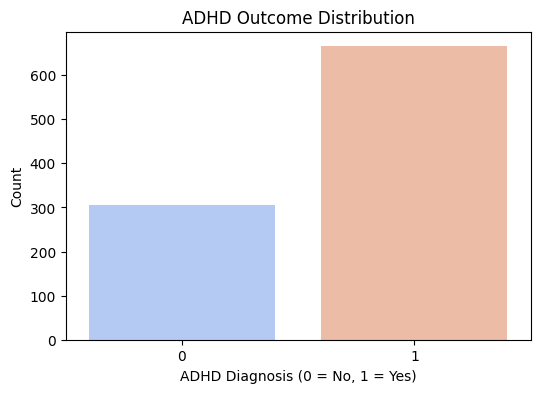

ADHD Cases: 665 (68.56%)
Non-ADHD Cases: 305 (31.44%)


In [89]:
## Analyzing class distribution

# Counting ADHD vs. Non-ADHD cases
plt.figure(figsize=(6, 4))
sns.countplot(x="ADHD_Outcome", data=train_df, hue="ADHD_Outcome", palette="coolwarm", legend=False)
plt.title("ADHD Outcome Distribution")
plt.xlabel("ADHD Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

adhd_counts = train_df["ADHD_Outcome"].value_counts()
adhd_percentages = train_df["ADHD_Outcome"].value_counts(normalize=True) * 100

# Displaying the counts and percentages
print(f"ADHD Cases: {adhd_counts[1]} ({adhd_percentages[1]:.2f}%)")
print(f"Non-ADHD Cases: {adhd_counts[0]} ({adhd_percentages[0]:.2f}%)")



In [90]:
# Analyzing relations

# Identifying non-numeric columns
non_numeric_cols = train_df.select_dtypes(exclude=["number"]).columns.tolist()

print("\nNon-Numeric Columns:")
print(non_numeric_cols)


Non-Numeric Columns:
['participant_id', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'Sex_F', 'ADHD_Outcome']


In [91]:
# Identifying categorical columns (excluding 'participant_id')
categorical_cols = train_df.select_dtypes(include=["category", "object"]).columns.tolist()
categorical_cols.remove("participant_id")  # Exclude ID column as it’s not relevant
print(categorical_cols)

['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', 'Sex_F', 'ADHD_Outcome']


In [ ]:
# Creating a temporary copy for correlation analysis
correlation_df = train_df.copy()

# Removing 'participant_id' from correlation_df. (This to avoid problems)
correlation_df = correlation_df.drop(columns=['participant_id'], errors='ignore')



In [ ]:
# Converting categorical columns to numeric codes for correlation only
for col in categorical_cols:
    correlation_df[col] = correlation_df[col].astype("category").cat.codes  

# Checking if all values are numeric before computing correlation
print("Data types after conversion:\n", correlation_df.dtypes)

# Computing correlation matrix
correlation_matrix = correlation_df.corr()

# Displaying correlation with ADHD_Outcome
adhd_correlation = correlation_matrix["ADHD_Outcome"].sort_values(ascending=False)
print("\nTop Features Correlated with ADHD Outcome:")
print(adhd_correlation.head(10))

Data types after conversion:
 APQ_P_APQ_P_CP            int64
APQ_P_APQ_P_ID            int64
APQ_P_APQ_P_INV           int64
APQ_P_APQ_P_OPD           int64
APQ_P_APQ_P_PM            int64
                         ...   
197throw_198thcolumn    float64
197throw_199thcolumn    float64
198throw_199thcolumn    float64
Sex_F                      int8
ADHD_Outcome               int8
Length: 19924, dtype: object

Top Features Correlated with ADHD Outcome:
ADHD_Outcome                  1.000000
SDQ_SDQ_Hyperactivity         0.564289
SDQ_SDQ_Externalizing         0.514902
SDQ_SDQ_Difficulties_Total    0.467406
SDQ_SDQ_Generating_Impact     0.402212
SDQ_SDQ_Conduct_Problems      0.267069
SDQ_SDQ_Internalizing         0.262186
SDQ_SDQ_Peer_Problems         0.240308
SDQ_SDQ_Emotional_Problems    0.193998
99throw_172thcolumn           0.123923
Name: ADHD_Outcome, dtype: float64


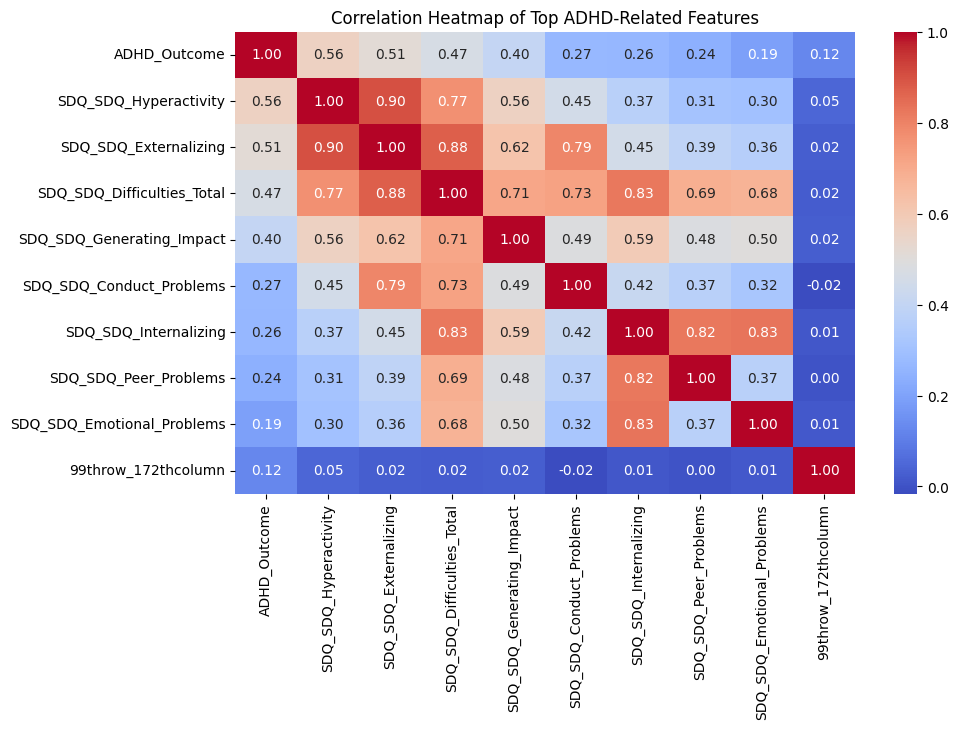


Least Correlated Features with ADHD Outcome:
Sex_F                  -0.112036
112throw_192thcolumn   -0.112232
78throw_189thcolumn    -0.112992
55throw_68thcolumn     -0.116728
0throw_6thcolumn       -0.118739
101throw_107thcolumn   -0.122387
3throw_57thcolumn      -0.126048
16throw_176thcolumn    -0.127204
43throw_198thcolumn    -0.144519
SDQ_SDQ_Prosocial      -0.164590
Name: ADHD_Outcome, dtype: float64


In [ ]:
# Selecting the top correlated features for heatmap
top_features = adhd_correlation.head(10).index

plt.figure(figsize=(10, 6))
sns.heatmap(train_df[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top ADHD-Related Features")
plt.show()

# Displaying the least correlated features, just to see
print("\nLeast Correlated Features with ADHD Outcome:")
print(adhd_correlation.tail(10))


**Observations of key variables**
  
Knowing now which are the most corraleted features.

With the following plots, the purpose is to:

Analyze how different features are distributed in the dataset.  
This helps to **identify distributions**, **identify outliers**, **understand feature ranges**, and **determine if transformations (scaling) are needed**.

Feature Scaling

Some features have different value ranges.  
Before modelling,  **Standardization (Z-score) or Min-Max Scaling** might be needed to normalize feature magnitudes.



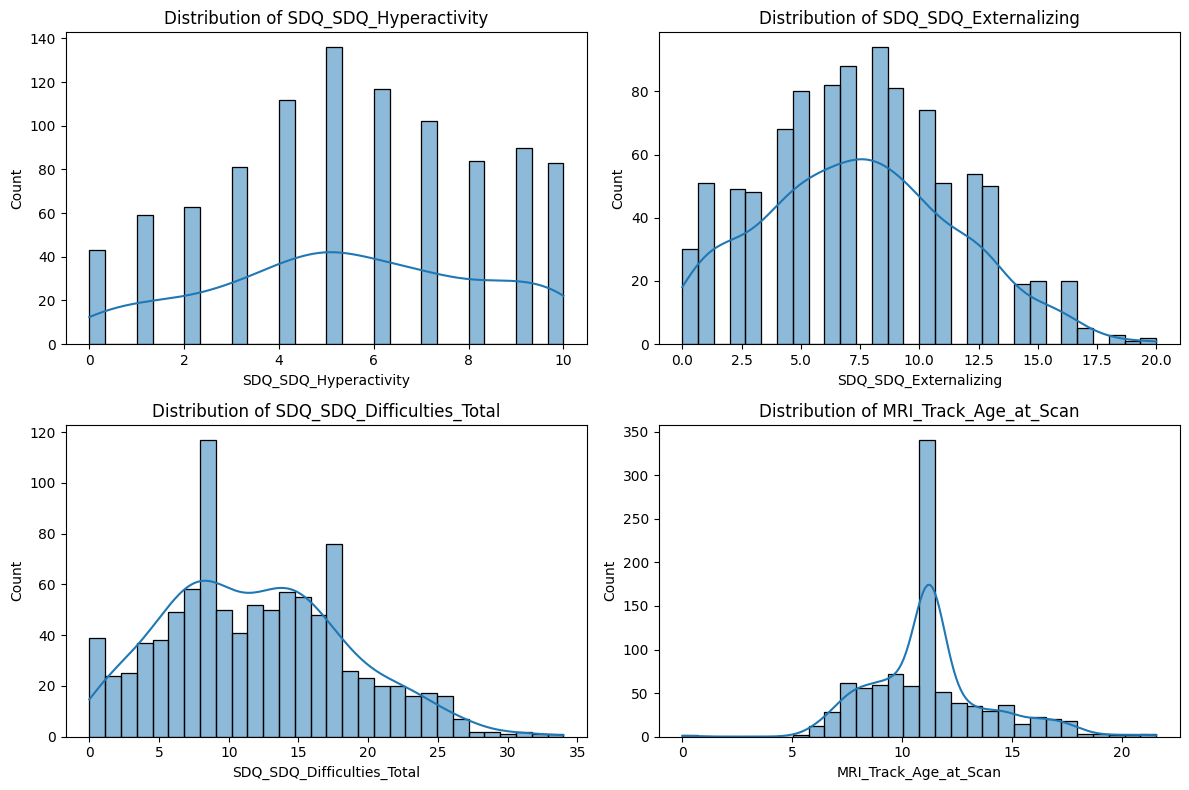

In [ ]:
# Plotting histograms of key behavioral and demographic features

features_to_plot = ["SDQ_SDQ_Hyperactivity", "SDQ_SDQ_Externalizing", "SDQ_SDQ_Difficulties_Total", "MRI_Track_Age_at_Scan"] # Adding the age, to see the common years old

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


- **SDQ_SDQ_Hyperactivity**: The distribution is relatively uniform, from 0 to 10. Its variability shows that individuals exhibit varying levels of hyperactivity symptoms.

- **SDQ_SDQ_Externalizing**: Externalizing score shows a slight right skew, indicating that a larger proportion of participants have moderate scores, with fewer having extremely high values.

- **SDQ_SDQ_Difficulties_Total**: This feature aggregates multiple behavioral metrics, showing a broader distribution. A concentration of values around 10 suggests a common difficulty level.

- **MRI_Track_Age_at_Scan**: The distribution of the subjects' ages when scanned with MRI is primarily at approximately 10 years with a tall peak, which means that most of them fall within the same age category. 



**Distribution of Features by ADHD Outcome**

To better understand how key features relate to ADHD diagnosis, lets compare their distributions for individuals **with (1) and without (0) ADHD**.

This allows to:
- Check if ADHD-diagnosed individuals have different behavioral patterns.
- Identify trends that might help in model selection later.
- Look for potential data imbalances across groups.

The following boxplots display feature distributions grouped by ADHD outcome.


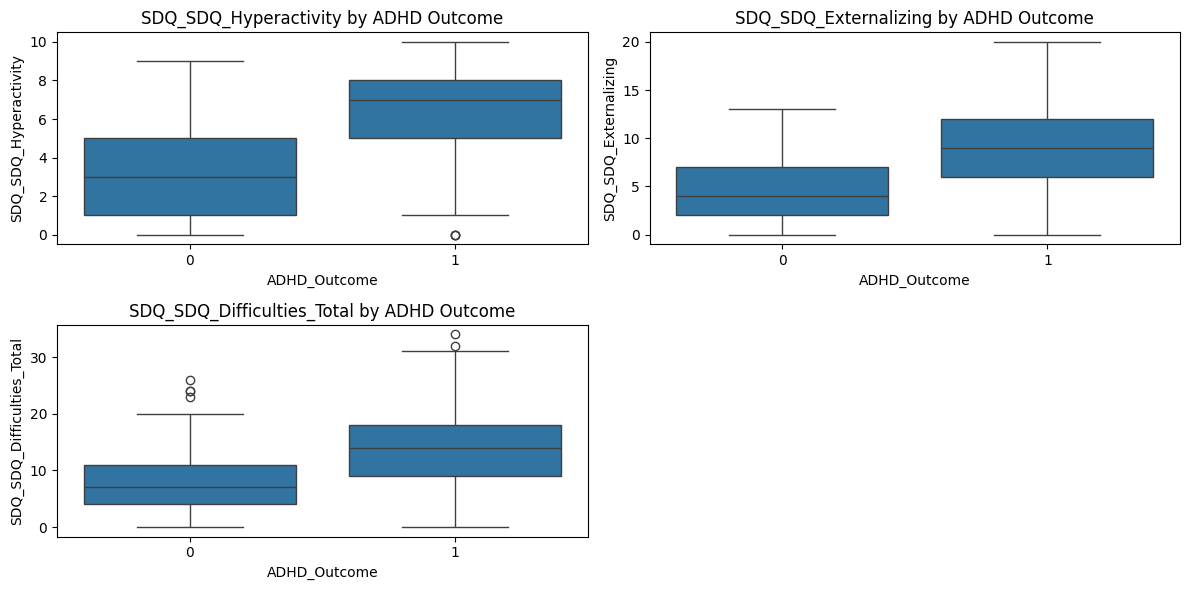

In [ ]:
# Boxplots of key features, separated by ADHD Outcome, only the first three most important
top_features = ["SDQ_SDQ_Hyperactivity", "SDQ_SDQ_Externalizing", "SDQ_SDQ_Difficulties_Total"]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="ADHD_Outcome", y=train_df[feature], data=train_df)
    plt.title(f"{feature} by ADHD Outcome")
plt.tight_layout()
plt.show()


**Observations:**
- **SDQ_SDQ_Hyperactivity**: Participants diagnosed with ADHD tend to have higher hyperactivity scores compared to non-ADHD participants, with minimal overlap.
- **SDQ_SDQ_Externalizing**: Externalizing behavior scores are noticeably higher for those with ADHD, suggesting a strong association with this feature.
- **SDQ_SDQ_Difficulties_Total**: Overall difficulty scores are significantly higher for ADHD participants, reinforcing the trend seen in individual behavioral components.

These insights validate the relevance of these features in differentiating ADHD cases from non-ADHD cases, potentially serving as important predictors in future modeling.


**Checking for outliers**

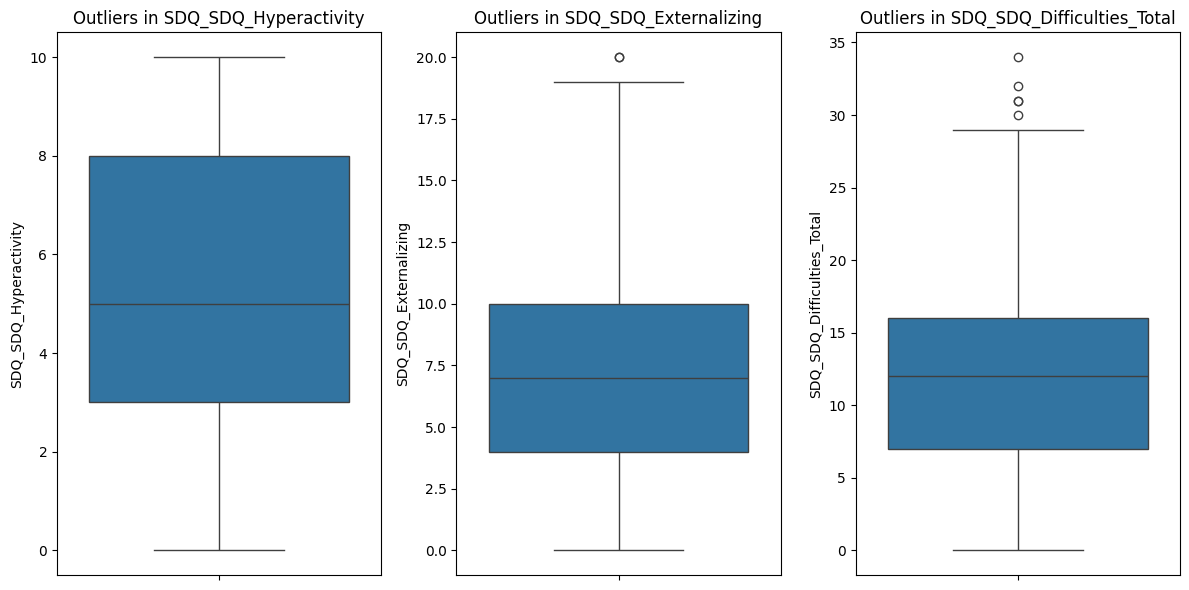

In [97]:
# Plotting boxplots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train_df[feature])
    plt.title(f"Outliers in {feature}")

plt.tight_layout()
plt.show()


**Why keeping the outliers**

After analyzing the outliers in key ADHD-related features (`SDQ_SDQ_Hyperactivity`, `SDQ_SDQ_Externalizing`, `SDQ_SDQ_Difficulties_Total`), not removing them can be a good idea due to the following reasons:

1. **ADHD is a Spectrum Disorder**  
   - Individuals with ADHD can have extreme scores in hyperactivity, externalizing behaviors, and difficulties.  
   - Removing high values could eliminate valid cases that are important for the analysis.

2. **Outliers Represent Real Observations**  
   - Extreme cases may reflect severe ADHD symptoms, which are critical for model learning.

3. **Retaining Maximum Variability in Data**  
   - Outliers increase the diversity of the dataset, which is beneficial for machine learning models.  
   - Removing them may lead to loss of information and potentially bias the model.



**Pairwise Relationships Between Key Features**

A **pairplot** helps to explore relationships between the features.  

This plot techique can be helpful for:
- Identifying potential clusters or patterns.
- Detecting non-linear relationships between features.
- Checking if ADHD cases form distinct groups based on multiple variables.

The plot below shows how the most correlated behavioral features interact.


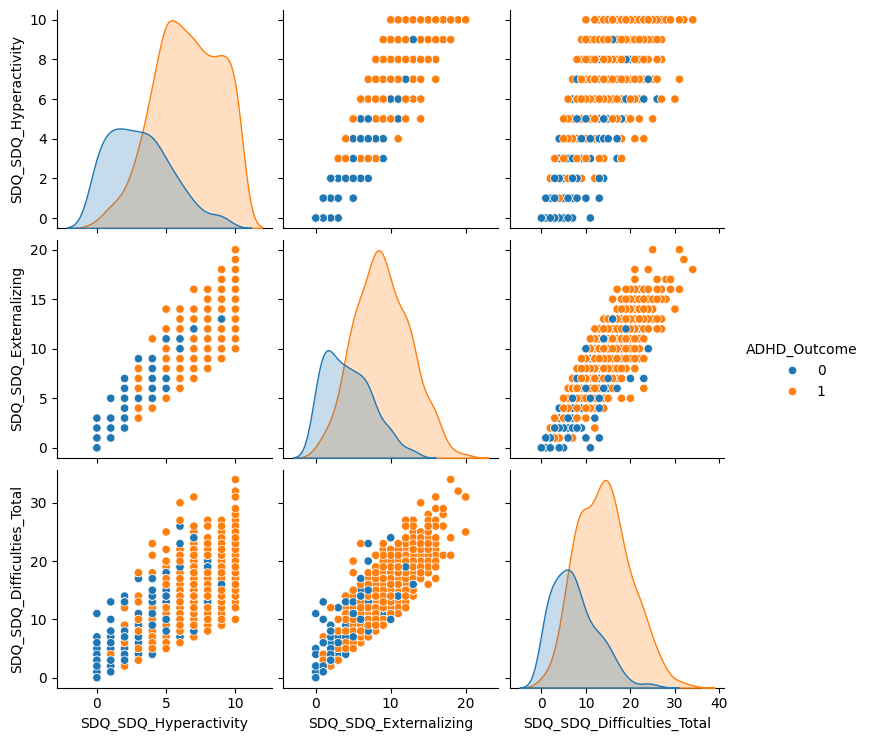

In [98]:
# Selecting key features for pairplot
key_features = ["ADHD_Outcome", "SDQ_SDQ_Hyperactivity", "SDQ_SDQ_Externalizing", "SDQ_SDQ_Difficulties_Total"]
sns.pairplot(train_df[key_features], hue="ADHD_Outcome", diag_kind="kde")
plt.show()



 *Key Insights:*
 
- **Distribution Differences:** The diagonal density plots reveal clear distribution differences between ADHD and non-ADHD participants. Features like **Hyperactivity**, **Externalizing**, and **Difficulties Total** show distinct patterns, with ADHD cases (orange) generally having higher values.
- **Feature Relationships:** The scatter plots show strong **positive correlations** between **Hyperactivity**, **Externalizing**, and **Difficulties Total**, reinforcing their role in ADHD characterization.
- **Separation of Classes:** The overlap between ADHD (orange) and non-ADHD (blue) is minimal for these features, indicating they could be **useful predictors** in distinguishing ADHD cases.

This visualization helps confirm that these **behavioral features hold predictive value** for ADHD classification, supporting their inclusion in further analysis.


Correlation Heatmap of Behavioral Features  
Lastly, a more small heatmap of correlation is made to focus the analysis, this heatmap displays **only the most relevant behavioral traits**. 

This helps to:
- Visualize how ADHD-related behaviors are connected.
- Make more informed decisions about feature selection for Stage 2.



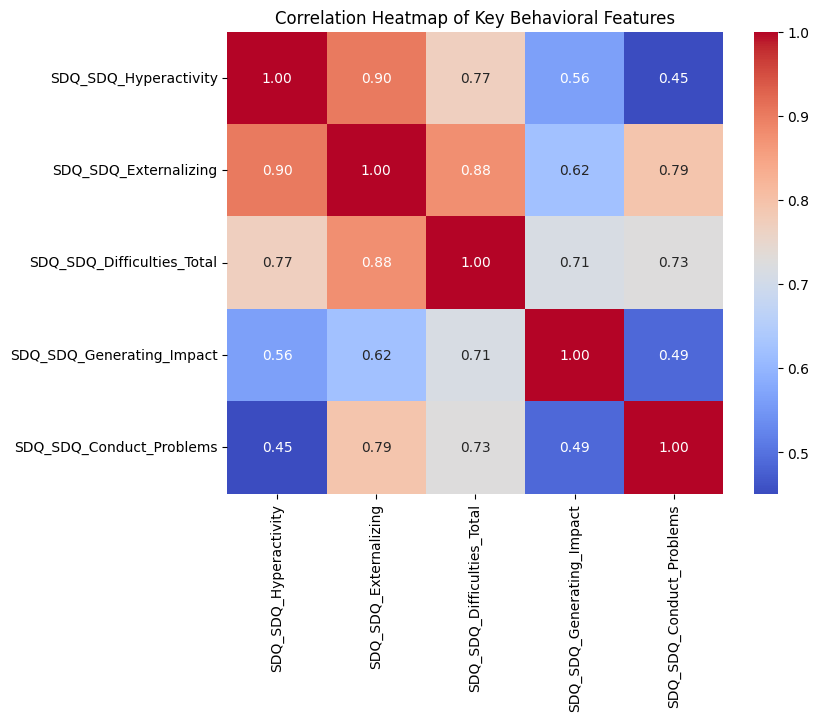

In [105]:
# Computing correlations for key behavioral features 
behavioral_features = ["SDQ_SDQ_Hyperactivity", "SDQ_SDQ_Externalizing", "SDQ_SDQ_Difficulties_Total", "SDQ_SDQ_Generating_Impact","SDQ_SDQ_Conduct_Problems"]

plt.figure(figsize=(8, 6))
sns.heatmap(train_df[behavioral_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Behavioral Features")
plt.show()



- **Strong Correlations:**
  - `SDQ_SDQ_Hyperactivity` and `SDQ_SDQ_Externalizing` show a **high correlation (0.90)**, suggesting that individuals who exhibit hyperactive behaviors often display externalizing behaviors as well.
  - `SDQ_SDQ_Externalizing` and `SDQ_SDQ_Difficulties_Total` also have a **strong correlation (0.88)**, indicating that externalizing behaviors contribute significantly to overall difficulties.
 

- **Moderate Correlations:**
  - `SDQ_SDQ_Difficulties_Total` and `SDQ_SDQ_Generating_Impact` share a **a correlation (0.71)**, meaning that generating_impact contribute to the total difficulties score.
  - `SDQ_SDQ_Conduct_Problems` is moderately correlated with `SDQ_SDQ_Difficulties_Total (0.73)`, meaning that conduct problems contribute to the total difficulties score.
  - `SDQ_SDQ_Generating_Impact` has weaker correlations with **Hyperactivity (0.56)** and **Externalizing (0.62)**, indicating that Generating_Impact are **less associated** with hyperactive and externalizing behaviors.



In [106]:
# Displaying columns with missing values (just to confirm)
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only showing columns with missing data

print("\nMissing Values in Training Data:")
print(missing_values)



Missing Values in Training Data:
Series([], dtype: int64)


In [107]:
train_df.describe()

,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,3.745361,13.231959,39.243299,17.735052,16.311340,25.229897,2.013402,11.944330,2.272165,7.460825,...,0.010766,-0.004926,-0.005123,0.001031,0.116580,0.048649,0.057229,0.095190,0.088700,0.128806
std,1.340834,3.751135,6.310718,3.750873,5.371059,3.962900,1.988830,6.483208,2.141571,4.105549,...,0.049400,0.047263,0.042608,0.046747,0.057500,0.051610,0.057756,0.053140,0.058624,0.057414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.056282,-0.204160,-0.083077
25%,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,...,-0.022058,-0.033387,-0.034345,-0.031158,0.081054,0.012374,0.021499,0.060491,0.052317,0.090048
50%,3.000000,13.000000,40.000000,18.000000,15.000000,26.000000,2.000000,12.000000,2.000000,7.000000,...,0.009959,-0.004083,-0.005069,0.000544,0.117343,0.051055,0.059678,0.095978,0.088408,0.128873
75%,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,16.000000,4.000000,10.000000,...,0.044883,0.024820,0.023487,0.031697,0.150798,0.082101,0.093910,0.128167,0.127380,0.166156
max,10.000000,24.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.221476,0.322084,0.348153,0.266411,0.414304


In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 81 to 954
Columns: 19925 entries, participant_id to ADHD_Outcome
dtypes: category(8), float64(19901), int64(15), object(1)
memory usage: 147.4+ MB


Saving the dataset for stage 2

In [ ]:
# Saving cleaned dataset for Stage 2
train_df.to_csv("cleaned_train_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_train_data.csv'")


Cleaned dataset saved as 'cleaned_train_data.csv'


**Plan for Stage 2: Modeling Approach**

With the dataset now cleaned and explored, the next step is to build predictive models to diagnose ADHD. Based on the findings from Stage 1, the following considerations will guide the modeling stage:

1. **Feature Scaling**  
   - Since some machine learning models are sensitive to feature magnitudes, normalization or standardization will be applied in Stage 2.  

2. **Potential Models for ADHD Prediction**

- **Logistic Regression:** Since it is a linear model which can estimate the probability of ADHD presence based on the features. It can also provide easily interpretable coefficients, allowing to understand which features contribute the most to ADHD classification. 

- **k-Nearest Neighbors (k-NN):** ADHD classification could benefit from k-NN due to similar behavioral or demographic patterns among participants.  

- **Random Forest:** ADHD diagnosis is influenced by different behavioral, demographic, and cognitive features. Random Forest’s capability to handle mixed data types makes it robust for this dataset. Besides, it automatically captures feature importance, which can help to get insights into the features influence. 

- **Support Vector Machine (SVM):** ADHD diagnosis may not be linearly separable, meaning a model that finds non-linear decision boundaries could be very helpful. SVMs can identify complex patterns, improving classification accuracy.

- **Neural Networks:** As ADHD diagnosis is a multi-faceted problem with diverse variables interacting in non-trivial ways. NN can automatically detect these interactions, making them ideal for capturing complex relationships.   


3. **Evaluation Metrics**  
   - **Accuracy:** General performance measure.  
   - **Precision & Recall:** To address potential class imbalance issues.  
   - **AUC-ROC:** To evaluate model discrimination ability.  

The next phase will focus on training, tuning, and validating these models while ensuring fairness and explainability in predictions.
